<img src="https://raw.githubusercontent.com/IgorCBzxc/volta-zero/main/Projeto%202/imagem_ebac.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### Projeto 02 - Ciência de Dados no mercado financeiro: Estimativa de renda para decisões de crédito mais precisas

**Aluno:** [Igor Coelho Barbosa](https://www.linkedin.com/in/igor-coelho-barbosa/)<br>
**Data:** 24 de dezembro de 2023.<br>

---


# <div style="text-align:center"> <div style="text-align:center"> Projeto 02 - Ciência de Dados no mercado financeiro: Estimativa de renda para decisões de crédito mais precisas </div>
 </div>

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira busca aprofundar seu entendimento sobre o perfil de renda de seus novos clientes, visando diversos objetivos, como otimizar a definição dos limites de cartões de crédito sem a necessidade de solicitar comprovantes de renda ou documentos que possam impactar a experiência do cliente.

Com esse propósito, conduziu um estudo com uma amostra de clientes, validando suas rendas por meio de olerites e outros documentos. Agora, a instituição pretende desenvolver um modelo preditivo para estimar a renda dos clientes com base em variáveis já existentes em seu banco de dados. Este modelo visa aprimorar a precisão na avaliação de perfil financeiro, promovendo uma abordagem mais eficiente e menos intrusiva para a definição de limites de crédito.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta dos eventos                                     | object|
| id_cliente              | Código identificador exclusivo do cliente                                      | int|
| sexo                    |  Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                      | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                                     | bool|
| posse_de_imovel         | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                                      | bool|
| qtd_filhos              | Quantidade de filhos do cliente                                      |int|
| tipo_renda              | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                                      | object|
| educacao                | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação)                                      | object|
| estado_civil            |  Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                      | object|
| tipo_residencia         | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)                                      | object|
| idade                   |  Idade do cliente                                      | int|
| tempo_emprego           |  Tempo no emprego atual                                      | float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                     | float|
| **renda**                   | Valor numérico decimal representando a renda do cliente em reais (Alvo)                                      | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [2]:
#!pip install ydata-profiling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [12]:
renda = pd.read_csv('previsao_de_renda.csv')

renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [16]:
renda.nunique()

Unnamed: 0               15000
data_ref                    15
id_cliente                9845
sexo                         2
posse_de_veiculo             2
posse_de_imovel              2
qtd_filhos                   8
tipo_renda                   5
educacao                     5
estado_civil                 5
tipo_residencia              6
idade                       47
tempo_emprego             2589
qt_pessoas_residencia        9
renda                     9786
dtype: int64

In [17]:
#removendo linhas desnecessárias

renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade após remoção das linhas duplicadas:',
      len(renda.drop_duplicates()), '\n')

renda.drop_duplicates(inplace=True, ignore_index=True)
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14593

In [18]:
renda.head(10)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,2015-01-01,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,2015-01-01,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,2015-01-01,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,2015-01-01,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


# Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [19]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Estatísticas descritivas das variáveis quantitativas


In [20]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


# Entendimento dos dados - Bivariadas




###Matriz de correlação


In [21]:
(renda
 .iloc[:,3:]
 .corr()
 .tail(n=1)
)

<ipython-input-21-61c7981f99a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .corr()


,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.004188,0.030296,0.023445,0.385014,0.048616,1.0


Alta correlação com tempo de emprego

###Matriz de dispersão

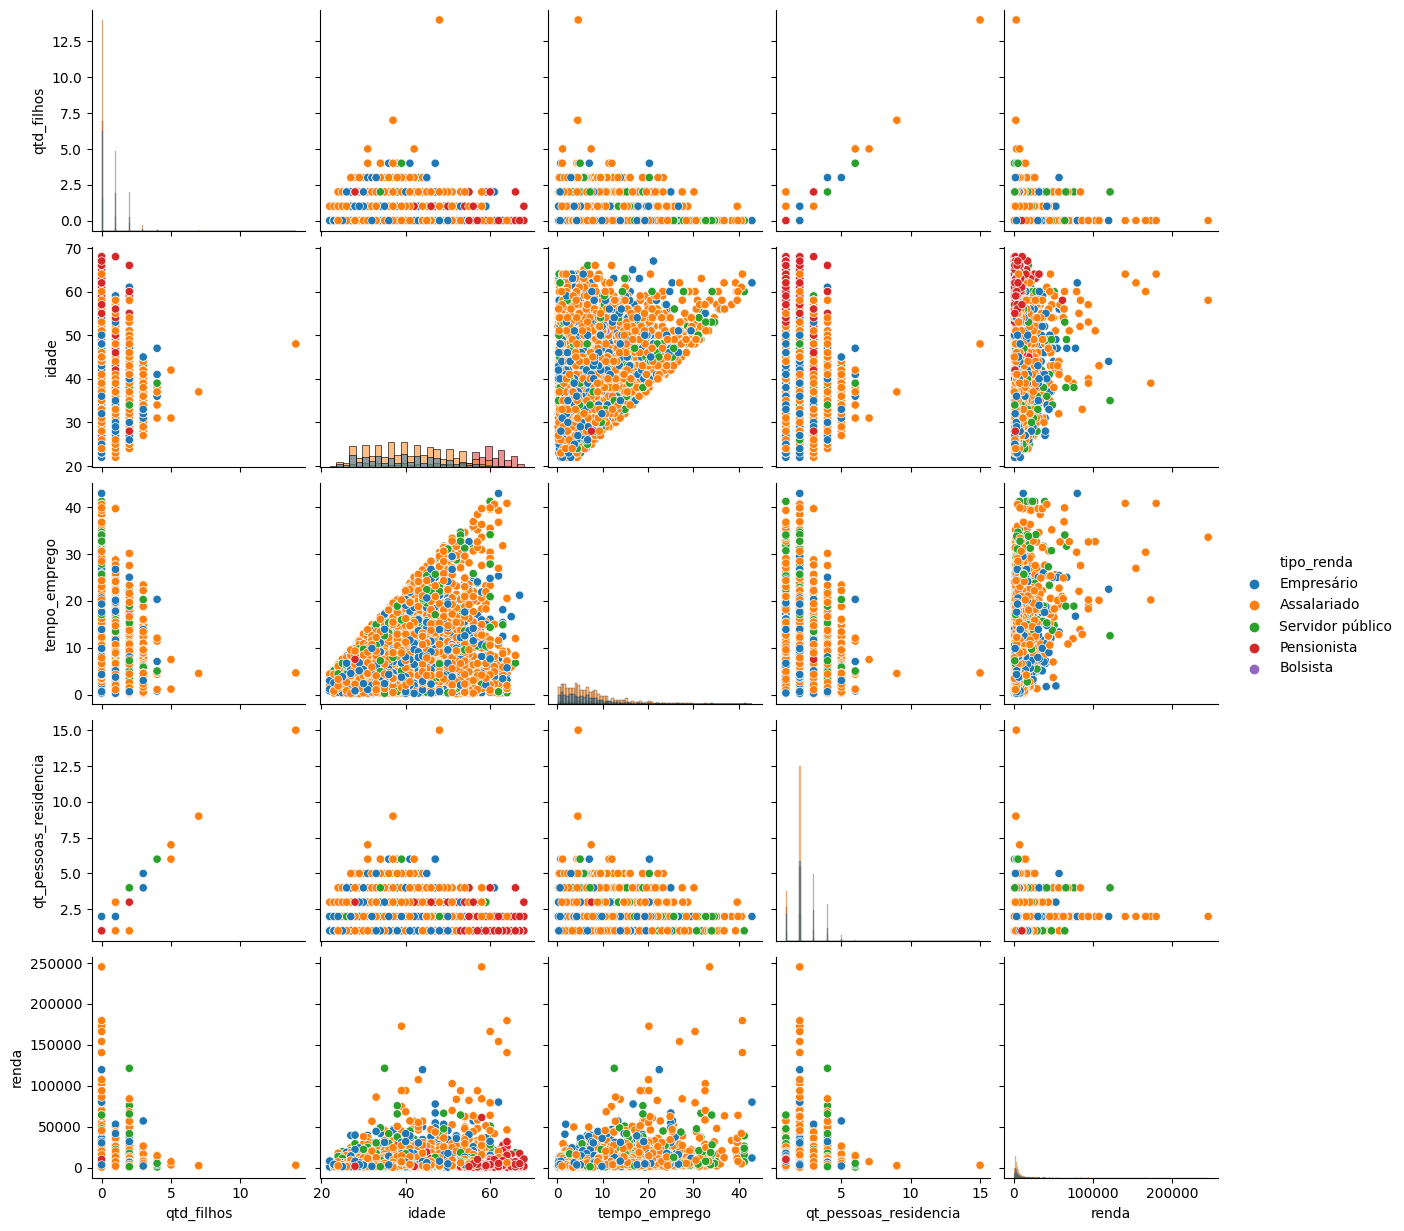

In [22]:
sns.pairplot(data=renda,
             hue='tipo_renda',
             vars=['qtd_filhos',
                   'idade',
                   'tempo_emprego',
                   'qt_pessoas_residencia',
                   'renda'],
             diag_kind='hist')

plt.show()

Após a análise, é evidente que há presença de alguns outliers na variável de renda. Embora esses valores discrepantes ocorram com baixa frequência, é crucial considerar seu impacto potencial nos resultados da análise de tendência. Adicionalmente, nota-se uma correlação geralmente fraca entre quase todas as variáveis quantitativas, o que corrobora com as conclusões derivadas da matriz de correlação.

###Clustermap


<ipython-input-23-7fd880805e8f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.clustermap(data=renda.corr(),


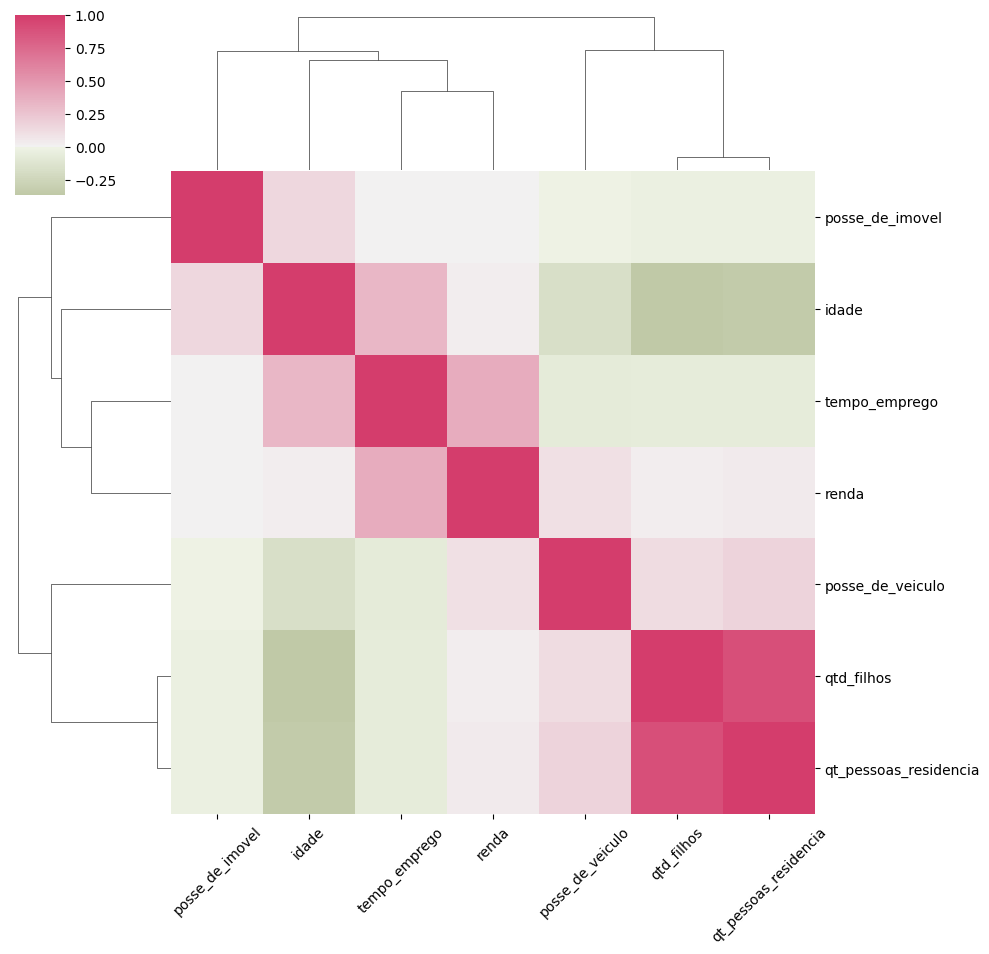

In [23]:
cmap = sns.diverging_palette(h_neg=100,
                             h_pos=359,
                             as_cmap=True,
                             sep=1,
                             center = 'light')

ax = sns.clustermap(data=renda.corr(),
               figsize=(10, 10),
               center=0,
               cmap=cmap)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()


Através do clustermap, é possível reiterar os resultados indicando uma correlação reduzida com a variável renda. Apenas a variável tempo_emprego revela um índice considerável para análise. Além disso, duas variáveis booleanas foram apresentadas, posse_de_imovel e posse_de_veiculo, ambas exibindo um baixo índice de correlação com a renda.

#Análise das variáveis qualitativas

###Análise de relevância preditiva com variáveis booleanas

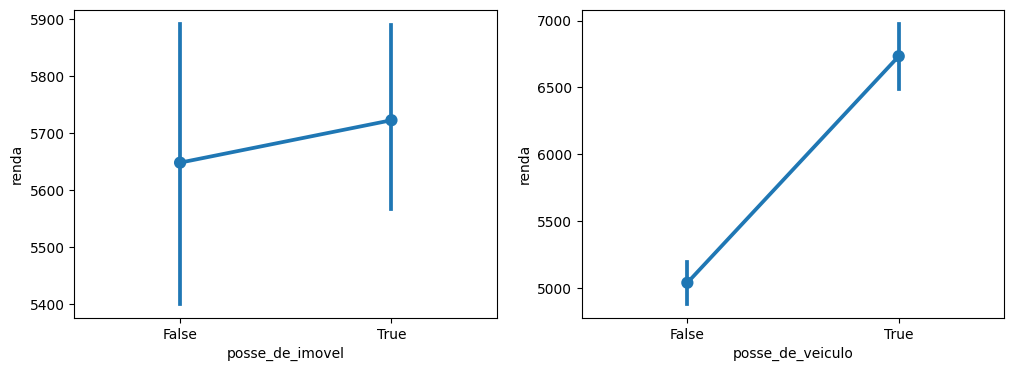

In [24]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel',
              y='renda',
              data=renda,
              dodge=True,
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo',
              y='renda',
              data=renda,
              dodge=True,
              ax=axes[1])

plt.show()

Ao analisar os gráficos acima, percebe-se que a variável posse_de_veículo exibe uma relevância maior na predição de renda. Isso é destacado pela maior distância entre os intervalos de confiança para indivíduos que possuem veículo em comparação com aqueles que não possuem. Em contraste, a variável posse_de_imóvel não demonstra diferença significativa entre as diversas condições de posse imobiliária.

### Análise das variáveis qualitativas ao longo do tempo

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


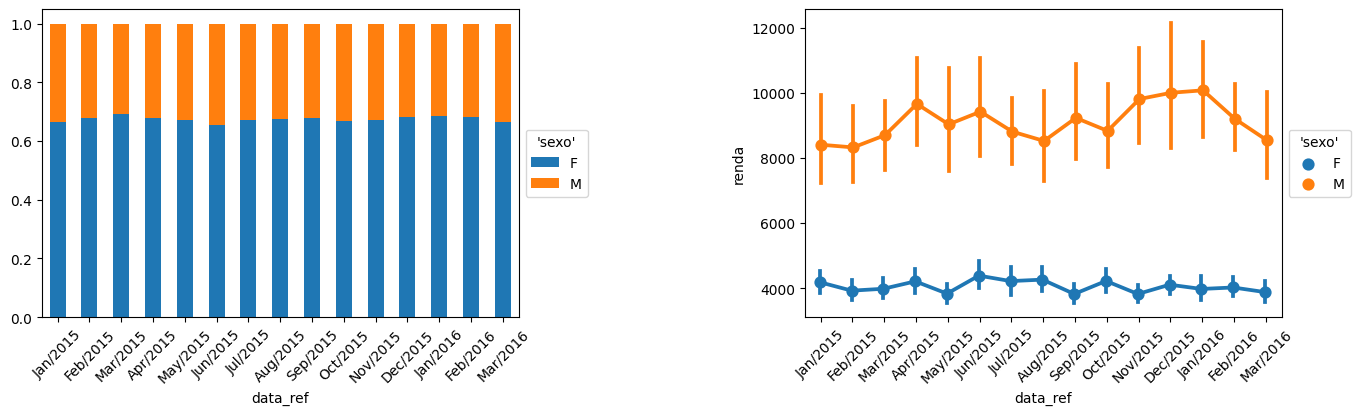

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


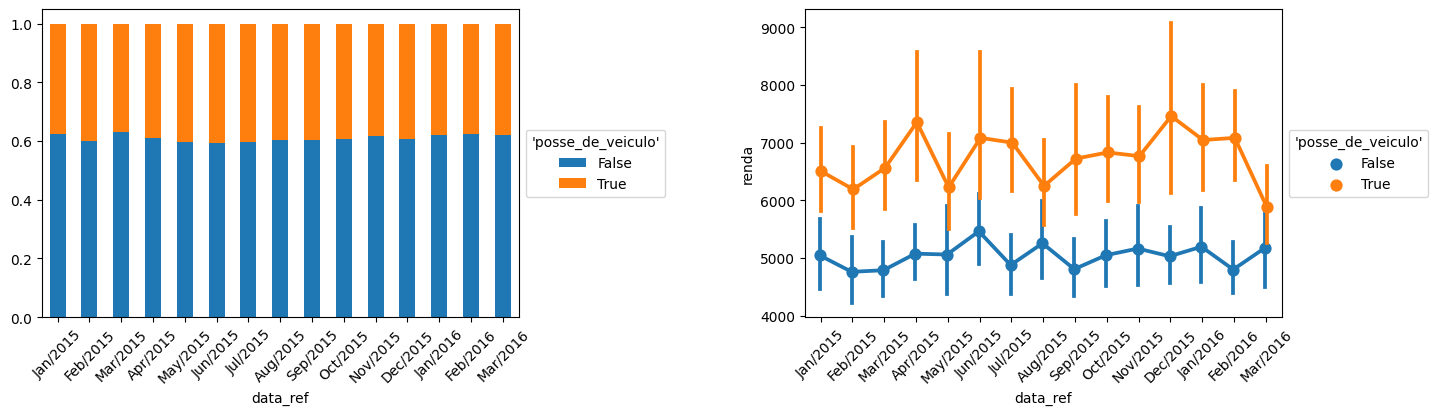

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


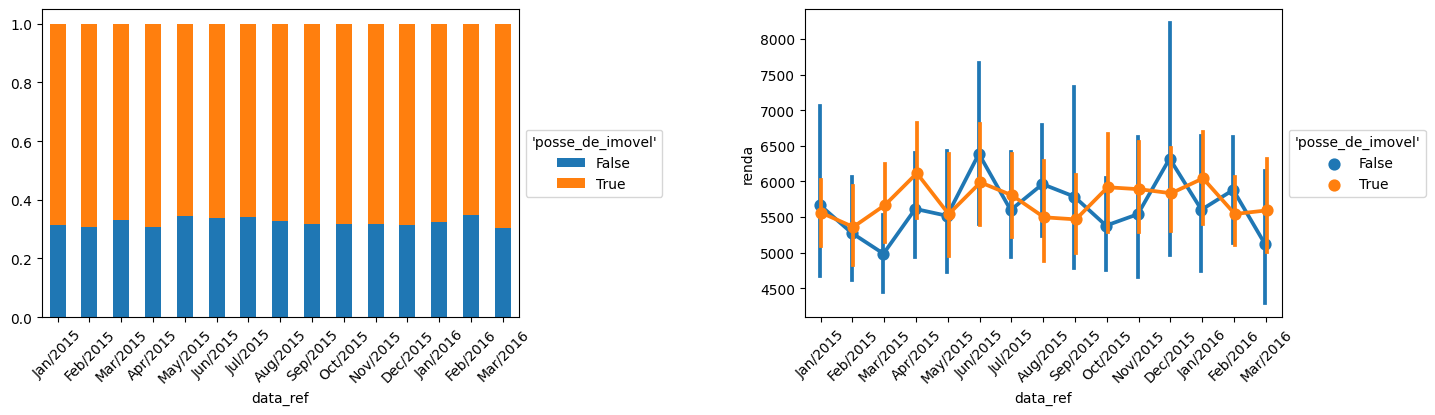

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


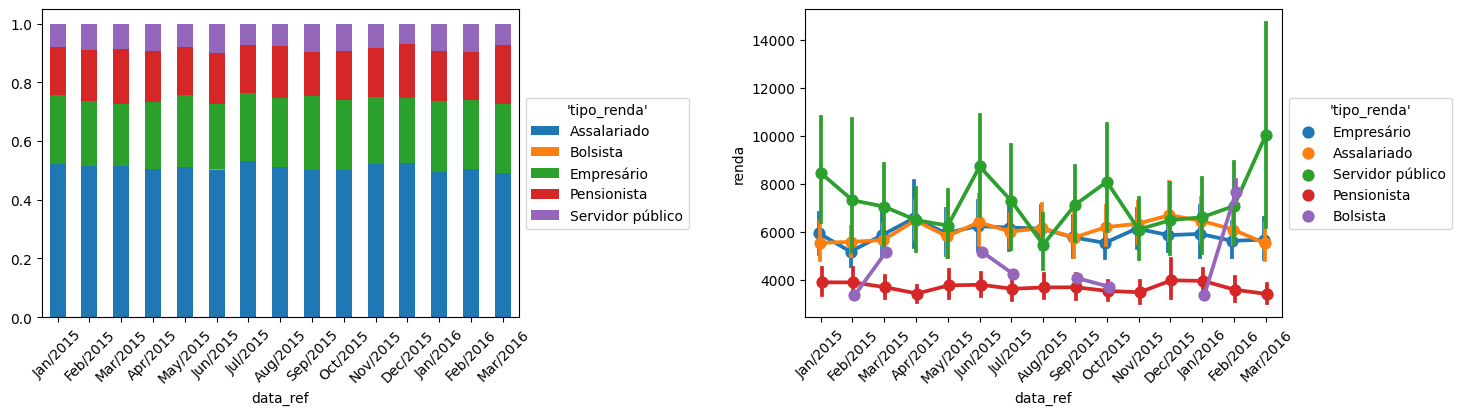

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


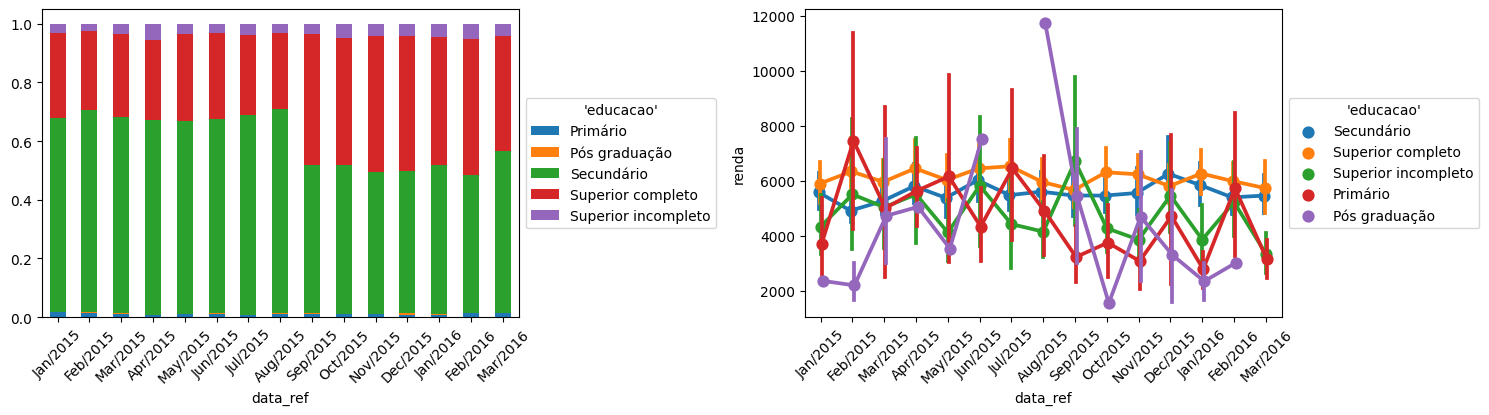

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


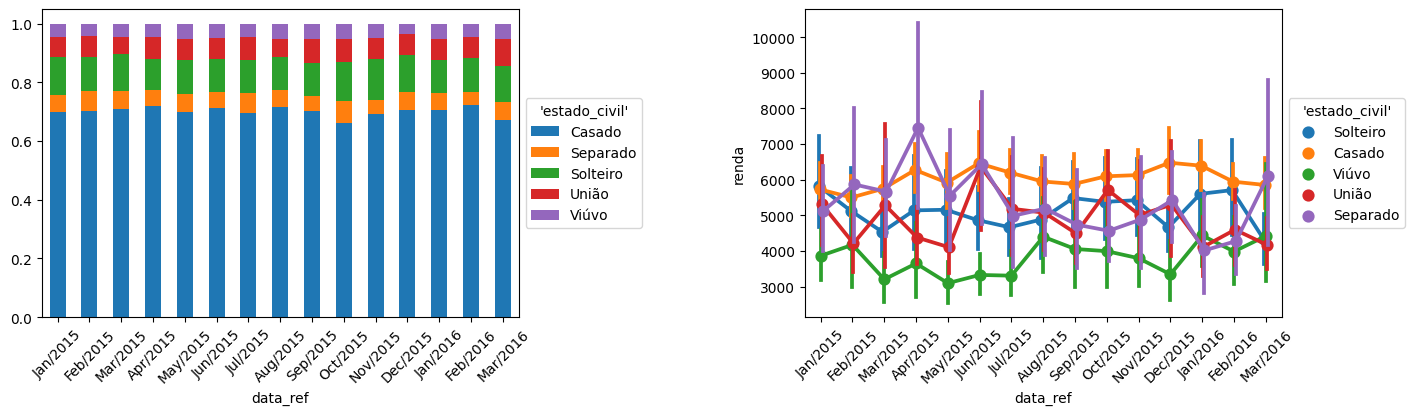

<ipython-input-26-37d4163eb8db>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])


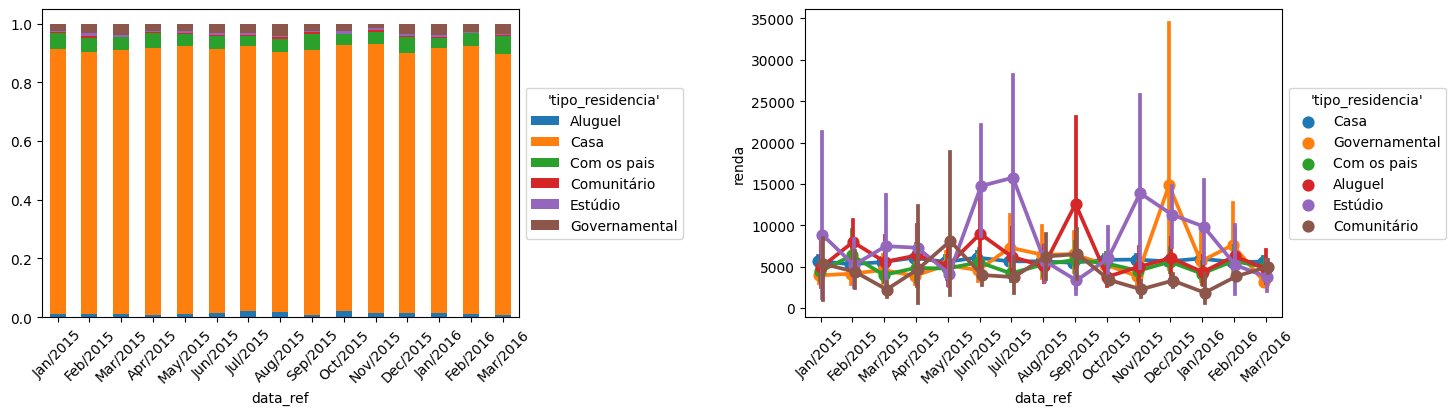

In [26]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)

    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'],
                                 columns=renda[col],
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True,
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [27]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index,
             data={'tipos_dados': renda.dtypes,
                   'qtd_valores': renda.notna().sum(),
                   'qtd_categorias': renda.nunique().values})

,tipos_dados,qtd_valores,qtd_categorias
sexo,object,12090,2
posse_de_veiculo,bool,12090,2
posse_de_imovel,bool,12090,2
qtd_filhos,int64,12090,8
tipo_renda,object,12090,5
educacao,object,12090,5
estado_civil,object,12090,5
tipo_residencia,object,12090,6
idade,int64,12090,46
tempo_emprego,float64,12090,2589


# Transformando variáveis categóricas em dummies

In [28]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  uint8  
 8   sexo_M                         12090 non-null  uint8  
 9   tipo_renda_Assalariado         12090 non-null  uint8  
 10  tipo_renda_Bolsista            12090 non-null  uint8  
 11  tipo_renda_Empresário          12090 non-null  uint8  
 12  tipo_renda_Pensionista         12090 non-null 

In [29]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var',
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

,var,corr
0,renda,1.000000
1,tempo_emprego,0.385014
2,sexo_M,0.265174
3,idade,0.127516
4,posse_de_veiculo,0.082040
5,estado_civil_Casado,0.054290
6,tipo_renda_Servidor público,0.042177
7,tipo_residencia_Estúdio,0.026417
8,qt_pessoas_residencia,0.019571
9,educacao_Superior completo,0.017425


# Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo



A técnica selecionada foi o **DecisionTreeRegressor**, escolhido devido à sua eficácia em lidar com problemas de regressão, como a previsão de renda dos clientes. As árvores de decisão foram preferidas por sua facilidade de interpretação e pela capacidade de identificar os atributos mais relevantes para a previsão da variável-alvo, tornando-as uma escolha sólida para este projeto.

##Divisão da base em treino e teste

In [30]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


## Seleção de hiperparâmetros do modelo com for loop


In [31]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42,
                                         max_depth=x,
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)

        score = pd.concat(objs=[score,
                                pd.DataFrame({'max_depth': [x],
                                              'min_samples_leaf': [y],
                                              'score': [reg_tree.score(X=X_test,
                                                                       y=y_test)]})],
                          axis=0,
                          ignore_index=True)

score.sort_values(by='score', ascending=False)

,max_depth,min_samples_leaf,score
213,8,4,0.417122
543,19,4,0.401091
243,9,4,0.401005
393,14,4,0.400246
245,9,6,0.399395
...,...,...,...
27,1,28,0.056241
28,1,29,0.056241
29,1,30,0.056241
1,1,2,0.056241


A melhor árvore teve profundidade de 8 e amostragem de no mínimo 4 por folha

### Rodando o modelo


In [32]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

## Plotando a da árvore

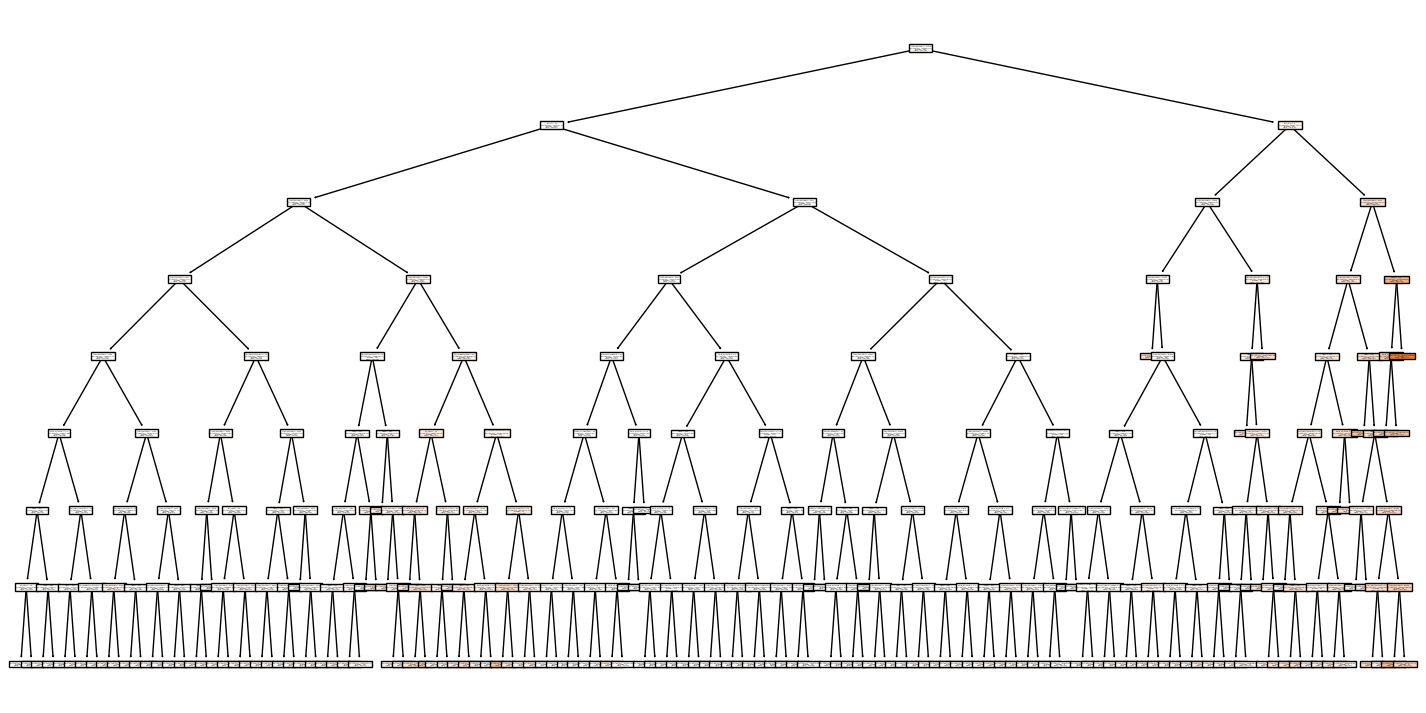

In [33]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree,
                    feature_names=X.columns,
                    filled=True)

## Etapa 5 Crisp-DM: Avaliação dos resultados


Nessa etapa vamos realizar o teste e obter os resultados do modelo


In [35]:

r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (𝑅2) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de treino é: 0,60
O coeficiente de determinação (𝑅2) da árvore com profundidade = 8 para a base de teste é: 0,42 



In [36]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

,renda,renda_predict
0,8060.34,3127.79
1,1852.15,7146.41
2,2253.89,2465.37
3,6600.77,3654.23
4,6475.97,5465.31
...,...,...
14587,1592.57,13209.09
14588,7990.58,6350.97
14590,604.82,4341.42
14591,3352.27,5465.31


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Executando o modelo e inserindo manualmente valores nas variáveis explicativas para obter um resultado na variável alvo, que é a renda.

In [38]:
entrada = pd.DataFrame([{'sexo': 'M',
                         'posse_de_veiculo': False,
                         'posse_de_imovel': True,
                         'qtd_filhos': 1,
                         'tipo_renda': 'Assalariado',
                         'educacao': 'Superior completo',
                         'estado_civil': 'Solteiro',
                         'tipo_residencia': 'Casa',
                         'idade': 34,
                         'tempo_emprego': None,
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$3671,41
